<a href="https://colab.research.google.com/github/Deleon57/EDAB6808/blob/main/EDAB_ASMT_3_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDAB6808 Assignment 3:  Demographic Profiling of Purchase Intent Using Probabilistic Models

**Group Memebrs:**

Macyla Hood 2024570521

Deleon Bernardü 2021368044

# Introduction

This assignment investigates the relationship between consumer demographics and purchasing behaviour through the use of probabilistic modelling. Specifically, it aims to determine which combinations of demographic variables are most likely to result in each of the four purchase intention types by analysing both balanced and unbalanced Bayesian Networks previously developed in Assignment 2. The project builds upon earlier work by applying advanced Bayesian inference techniques to explore conditional probabilities of purchase intention within varied demographic groupings. These demographic variables include Gender, Marital Status, Age, Education, Employment, Type of Customer, and Shopping Frequency.

The analysis is divided into three main components. Part 1 focuses on data preparation and cleaning, where the original Subsistence Retail Consumer Data is structured and used to construct all plausible combinations of demographic profiles. Part 2 applies Bayesian inference to calculate and compare the conditional probabilities of high purchase intention (PI = 4 or 5) across balanced and unbalanced datasets, including synthetic balancing methods such as SMOTE, GAN, and ML-based sampling. Part 3 then interprets the probability results, comparing model outputs to identify potential biases introduced by balancing techniques and discussing how demographic predictors shift across models.

The study is motivated by the need to understand how demographic characteristics interact to shape consumer intent in a retail environment. By modelling these relationships probabilistically, the research provides insights into the profiles most likely to exhibit strong purchase intentions, offering value for both data-driven marketing segmentation and ethical model evaluation.

Research Question / Hypothesis:
Which combination(s) of demographic variables produce the highest probability of a high purchase intention across both balanced and unbalanced Bayesian Networks?
It is hypothesised that while data balancing techniques such as SMOTE and GAN may alter the distribution of demographic predictors, the core demographic combinations associated with strong purchase intent will remain consistent across models, indicating stable underlying behavioural patterns.


# Recap of Asignment 2

Assignment 2 explored how different data balancing and synthetic data generation techniques, namely SMOTE, Machine Learning (KNN) imputation, and Generative Adversarial Networks (GANs) influence the performance of Bayesian Networks in predicting purchase intention using the Soweto subsistence retail dataset. The aim was to determine which method produces the most accurate, stable, and interpretable Bayesian Network model after addressing class imbalance. The findings revealed that while SMOTE achieved the highest training accuracy, it suffered from overfitting, and the GAN-based model underperformed due to distorted feature distributions. In contrast, the KNN-balanced Bayesian Network provided the most consistent generalisation and coherence across classes, preserving data realism without compromising predictive performance. Consequently, the study concluded that KNN imputation was the most effective balancing method for enhancing the reliability and interpretability of Bayesian Network predictions within the context of subsistence retail analytics.

Visualisation of Expert DAG used Asignment 2

In [ ]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


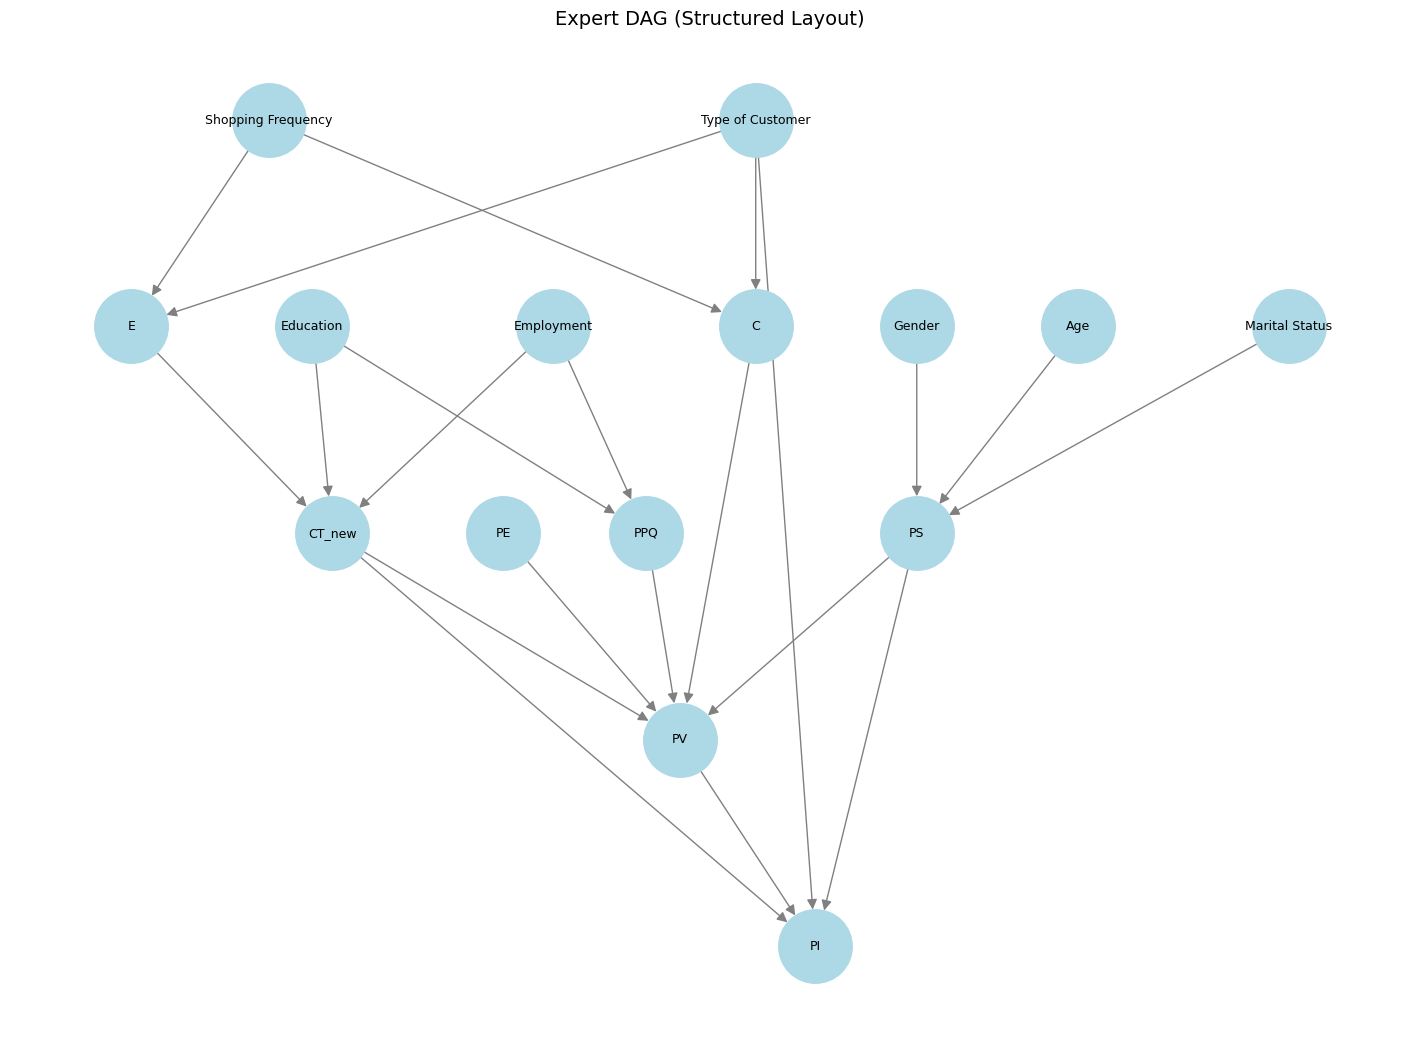

In [ ]:
# Load the saved DAG
with open("expert_dag.pkl", "rb") as f:
    expert_dag = pickle.load(f)

# Visualise again (same code you used)
plt.figure(figsize=(14, 10))
pos = nx.nx_agraph.graphviz_layout(expert_dag, prog="dot")
nx.draw(
    expert_dag, pos,
    with_labels=True,
    node_size=2800,
    node_color="lightblue",
    font_size=9,
    arrowsize=15,
    edge_color="gray"
)
plt.title("Expert DAG (Structured Layout)", fontsize=14)
plt.show()


#Part 1: Balanced data

**Summary of Part 1**

For part 1 of the assignment, the dataset titled “Subsistence Retail Consumer Data.xlsx” was imported and prepared for Bayesian Network analysis. First, all the necessary Python libraries such as pandas, numpy, bnlearn, matplotlib, networkx, and sklearn.metrics were installed and imported to allow data manipulation, visualization, and model evaluation. The dataset was then loaded into a pandas DataFrame, after which the demographic variables (Gender, Marital Status, Age, Employment, Education, Type of Customer, and Shopping Frequency) were renamed to make them more readable. Aggregated constructs were then created by calculating the mean scores of related items such as Empathy (E1–E4), Convenience (C1–C3), Price Sensitivity (PS1–PS3), Perceived Quality (PQ1–PQ4), Perceived Value (PV1–PV3), and Purchase Intention (PI1–PI4). These averages were rounded to the nearest integer to maintain categorical consistency. A new DataFrame called df_transformed was then created to store these cleaned and aggregated variables, representing a structured version of the original data. After this, a pre-trained Imbalanced Bayesian Network model was loaded from a pkl file using the pickle library, allowing inference and prediction to be performed on the balanced dataset. A demographic matrix was then constructed by identifying all unique values within the demographic variables and generating every possible combination using the itertools.product function. This ensured that all potential demographic profiles were represented. Finally, a validation step was performed to confirm that the number of generated combinations matched the theoretical total by multiplying the unique category counts per demographic variable, ensuring the completeness and accuracy of the demographic matrix.

In [ ]:
# Install Bayesian Network library
!pip install bnlearn

import pandas as pd
import pandas as pd
import numpy as np
import bnlearn as bn
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.8 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=e946d7860034300c73383946e70d8c42d0cd558aa3e0ec12cbd1f2bebf11b0eb
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


**Load data**

In [ ]:
# Load dataset
df = pd.read_excel("/content/Subsistence Retail Consumer Data.xlsx")

print(df.head())

   Gender A1  Marital Status A2  Age A3  Employment Status A4  \
0          3                  1       4                     1   
1          3                  3       5                     1   
2          2                  2       4                     2   
3          1                  1       3                     1   
4          3                  1       2                     2   

   Level of Education A5  Regular Customer A6  Shopping frequency A7  E1  E2  \
0                      4                    2                      3   3   2   
1                      4                    1                      1   3   3   
2                      2                    2                      2   3   4   
3                      3                    2                      1   3   2   
4                      2                    2                      3   2   4   

   E3  ...  CT5  CT6  CT7  PV1  PV2  PV3  PI1  PI2  PI3  PI4  
0   4  ...    3    2    4    2    4    4    3    4    4    4  
1 

In [ ]:
# Rename Demographic measures
df = df.rename(columns={'Gender A1': 'Gender'})
df = df.rename(columns={'Marital Status A2': 'Marital Status'})
df = df.rename(columns={'Age A3': 'Age'})
df = df.rename(columns={'Employment Status A4': 'Employment'})
df = df.rename(columns={'Level of Education A5': 'Education'})
df = df.rename(columns={'Regular Customer A6': 'Type of Customer'})
df = df.rename(columns={'Shopping frequency A7': 'Shopping Frequency'})

# Creating aggregated features
df_transformed = pd.DataFrame()
df_transformed[['PI1','PI2','PI3','PI4']] = df[['PI1','PI2','PI3','PI4']]
df_transformed['Gender'] = df['Gender']
df_transformed['Marital Status'] = df['Marital Status']
df_transformed['Age'] = df['Age']
df_transformed['Employment'] = df['Employment']
df_transformed['Education'] = df['Education']
df_transformed['Type of Customer'] = df['Type of Customer']
df_transformed['Shopping Frequency'] = df['Shopping Frequency']
df_transformed[['PI1','PI2','PI3','PI4']] = df[['PI1','PI2','PI3','PI4']]

# Averages of measurement instruments and also rounding to nearest integer
import pandas as pd

# Creating a new dataframe for the transformed variables
df_transformed = pd.DataFrame()

# Compute means (row-wise) for the constructs that are strong enough
df_transformed["E"]   = df[["E1", "E2", "E3", "E4"]].mean(axis=1).round().astype(int)
df_transformed["C"]   = df[["C1", "C2", "C3"]].mean(axis=1).round().astype(int)
df_transformed["PS"]  = df[["PS1", "PS2", "PS3"]].mean(axis=1).round().astype(int)
df_transformed["PPQ"] = df[["PPQ1", "PPQ2", "PPQ3", "PPQ4"]].mean(axis=1).round().astype(int)
df_transformed["PV"]  = df[["PV1", "PV2", "PV3"]].mean(axis=1).round().astype(int)
df_transformed["PI"]  = df[["PI1", "PI2", "PI3", "PI4"]].mean(axis=1).round().astype(int)
df_transformed['Gender']=df['Gender']
df_transformed['Marital Status']=df['Marital Status']
df_transformed['Age']=df['Age']
df_transformed['Employment']=df['Employment']
df_transformed['Education']=df['Education']
df_transformed['Type of Customer']=df['Type of Customer']
df_transformed['Shopping Frequency']=df['Shopping Frequency']

In [ ]:
print(df_transformed.head())
print(df_transformed.shape)

   E  C  PS  PPQ  PV  PI  Gender  Marital Status  Age  Employment  Education  \
0  3  3   2    4   3   4       3               1    4           1          4   
1  3  4   3    2   2   4       3               3    5           1          4   
2  3  3   3    3   2   3       2               2    4           2          2   
3  3  3   4    3   2   4       1               1    3           1          3   
4  3  3   2    3   3   2       3               1    2           2          2   

   Type of Customer  Shopping Frequency  
0                 2                   3  
1                 1                   1  
2                 2                   2  
3                 2                   1  
4                 2                   3  
(281, 13)


Import pkl file

In [ ]:
#Loading pre-trained Imbalanced Bayesian Network model
import pickle

with open("fitted_bn_model(Imbalanced).pkl", "rb") as f:
    fitted_model = pickle.load(f)

print("BN model loaded successfully and ready to use!")

BN model loaded successfully and ready to use!


**Demographic matrix**

In [ ]:
import itertools
import pandas as pd

# Select the demographic columns
demographic_vars = [
    "Gender", "Marital Status", "Age",
    "Education", "Employment",
    "Type of Customer", "Shopping Frequency"
]

# Get unique values for each demographic variable
unique_values = [df_transformed[col].unique().tolist() for col in demographic_vars]

# Generate all combinations
combinations = list(itertools.product(*unique_values))

# Convert to DataFrame
combination_matrix = pd.DataFrame(combinations, columns=demographic_vars)

print("Number of demographic combinations:", len(combination_matrix))
print(combination_matrix.head())


Number of demographic combinations: 4500
   Gender  Marital Status  Age  Education  Employment  Type of Customer  \
0       3               1    4          4           1                 2   
1       3               1    4          4           1                 2   
2       3               1    4          4           1                 2   
3       3               1    4          4           1                 2   
4       3               1    4          4           1                 2   

   Shopping Frequency  
0                   3  
1                   1  
2                   2  
3                   5  
4                   4  


**Check that matrix have correct number of rows**

In [ ]:
import numpy as np

# Define demographic variables
demographic_vars = [
    "Gender", "Marital Status", "Age",
    "Education", "Employment",
    "Type of Customer", "Shopping Frequency"
]

# Count unique values for each demographic variable
unique_counts = {col: df_transformed[col].nunique() for col in demographic_vars}

print("Unique category counts per demographic:")
for k, v in unique_counts.items():
    print(f"{k}: {v}")

# Multiply all counts together
total_combinations = np.prod(list(unique_counts.values()))

print("\nTotal possible combinations:", total_combinations)


Unique category counts per demographic:
Gender: 3
Marital Status: 3
Age: 5
Education: 5
Employment: 2
Type of Customer: 2
Shopping Frequency: 5

Total possible combinations: 4500


# Part 2: Probability Analysis below

**Summary of Part 2**

In Part 2 of the assignment, the focus was on performing a probability analysis for the imbalanced dataset using the fitted Bayesian Network model. The objective was to calculate the likelihood of a high purchase intention (PI equal to 4 or 5) for all demographic combinations that were previously generated. Each of the 4500 demographic profiles in the combination matrix was treated as evidence and passed through the Bayesian Network to obtain probability distributions for all possible purchase intention levels from 1 to 5. These probabilities were stored and then used to calculate a combined probability representing the likelihood of high purchase intention. All results were compiled into a decision table containing both demographic details and the corresponding probabilities. The table was then sorted to identify the top ten demographic profiles with the highest probability of high purchase intention, providing insight into which customer groups were most likely to make purchases. The decision table was further refined by converting probability values into numeric form, recalculating totals, and applying formatting to ensure clarity and consistency. A blue colour gradient was applied to highlight probability strengths visually, and demographic codes were replaced with descriptive labels such as “Male”, “Female”, “Married”, or “Employed” to improve interpretation. The final output was a neatly formatted table showing both demographic characteristics and their corresponding probability levels. The same process was applied to the Imabalanced Data and all the Balanced Dataset Methods models, namely the Balanced (SMOTE), Balanced (ML), and Balanced (GAN) datasets, allowing for direct comparison between the imbalanced and balanced Bayesian Network results.

# Reference Table of demographics from original study questionare

The Reference table below shows clearly what each numeric value (1–5) represents for the different demographic variables in the dataset, such as gender, age, education level, and employment status.

In [ ]:
# Define the demographic coding
data = {
    "Gender": ["Male", "Female", "I prefer not to say", "", ""],
    "Marital Status": ["Married", "Single", "I prefer not to say", "", ""],
    "Age": ["18–22", "23–28", "29–35", "35–49", "50–65"],
    "Education Level": ["No formal education", "Basic Education", "Diploma", "Degree", "Postgraduate degree"],
    "Employment Status": ["Employed", "Unemployed", "", "", ""],
    "Type of Customer": ["Regular customer", "Occasional customer (only visits when needed)", "", "", ""],
    "Shopping Frequency": ["1–2 times per week", "2–3 times per week", "3–4 times per week", "5–6 times per week", "6–7 times per week"]
}

# Create DataFrame
df_demo = pd.DataFrame(data, index=[1, 2, 3, 4, 5])

# Replace NaN with blank spaces (in case of future data changes)
df_demo = df_demo.fillna("")

# Apply styling for a clean display
styled_table = (
    df_demo.style
    .set_caption("Demographic Coding Reference Table:")
    .set_table_styles(
        [
            {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold"), ("text-align", "center"), ("color", "#2e3432"), ("padding", "10px 0")]},
            {"selector": "th", "props": [("background-color", "#6484a4"), ("color", "white"), ("font-weight", "bold"), ("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center"), ("font-size", "13px"), ("border", "1px solid #ddd"), ("padding", "6px")]}
        ]
    )
)

# Display styled table
styled_table




,Gender,Marital Status,Age,Education Level,Employment Status,Type of Customer,Shopping Frequency
1,Male,Married,18–22,No formal education,Employed,Regular customer,1–2 times per week
2,Female,Single,23–28,Basic Education,Unemployed,Occasional customer (only visits when needed),2–3 times per week
3,I prefer not to say,I prefer not to say,29–35,Diploma,,,3–4 times per week
4,,,35–49,Degree,,,5–6 times per week
5,,,50–65,Postgraduate degree,,,6–7 times per week


#Imbalanced Data

**Probabilities of PI1 given each combination from the demographic matrix**

This block will loop through all 4500 rows in the combination_matrix, treat each row as evidence, and then query the fitted Bayesian Network (fitted_model) for the probability distribution of PI1.

In [ ]:
results = []

for idx, row in combination_matrix.iterrows():
    evidence = row.to_dict()

    # Inference for PI1
    query = bn.inference.fit(fitted_model, variables=["PI"], evidence=evidence)

    # States and probabilities
    states = query.state_names["PI"]
    probs = query.values

    # Store all category probabilities
    prob_dict = {f"P(PI={state})": prob for state, prob in zip(states, probs)}

    # Calculate combined probability for PI1=4 or 5
    prob_high = sum(prob for state, prob in zip(states, probs) if state in [4, 5])

    # Append results: demographics + full PI distribution + combined
    results.append({
        **evidence,
        **prob_dict,
        "P(PI=4or5)": prob_high
    })

Streaming output truncated to the last 5000 lines.
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=1

PI outcomes:
- PI: 1 (19.0%)
- PI: 2 (19.7%)
- PI: 3 (20.7%)
- PI: 4 (21.1%)
- PI: 5 (19.4%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.190134 |
+----+------+----------+
|  1 |    2 | 0.197447 |
+----+------+----------+
|  2 |    3 | 0.206705 |
+----+------+----------+
|  3 |    4 | 0.2112   |
+----+------+----------+
|  4 |    5 | 0.194514 |
+----+------+----------+

Summary for variables: ['PI']
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=2

PI outcomes:
- PI: 1 (19.0%)
- PI: 2 (19.7%)
- PI: 3 (20.7%)
- PI: 4 (21.1%)
- PI: 5 (19.5%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.190134 |
+

**Top 10 demographical combinations for high purcahse intention**

High purchase intention: PI=4 or PI=5

In [ ]:
# Convert to DataFrame
decision_table = pd.DataFrame(results)

# Sort by highest probability of PI1=4 or 5
decision_table = decision_table.sort_values(by="P(PI=4or5)", ascending=False).reset_index(drop=True)

# Show top 10 profiles
print(decision_table.head(10))

   Gender  Marital Status  Age  Education  Employment  Type of Customer  \
0       2               2    4          2           2                 1   
1       2               2    4          2           2                 1   
2       2               2    4          2           2                 1   
3       2               2    4          2           2                 1   
4       2               2    4          2           2                 1   
5       2               2    4          2           1                 1   
6       2               2    4          2           1                 1   
7       2               2    4          3           2                 1   
8       2               2    4          3           2                 1   
9       2               2    4          1           2                 1   

   Shopping Frequency   P(PI=1)   P(PI=2)   P(PI=3)   P(PI=4)   P(PI=5)  \
0                   1  0.165915  0.171576  0.185230  0.254266  0.223013   
1                   2  0

**Decision Tables**

In [ ]:
#1) Build decision table cleanly from 'results'
decision_table = pd.DataFrame(results)

#2) Force probability columns to numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols + (["P(PI=4or5)"] if "P(PI=4or5)" in decision_table.columns else []):
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# 3) Recompute P(PI=4or5) as sum of P(PI=4)+P(PI=5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

#4) Sort by highest probability and select top 10 profiles
decision_table = decision_table.sort_values("P(PI=4or5)", ascending=False, kind="mergesort").reset_index(drop=True)
df_top = decision_table.head(10).copy()

#5) Styled table (clean output only, no raw print)
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

styled_table = (
    df_top.style
        .background_gradient(subset=prob_cols_all, cmap="Blues")
        .format({c: "{:.6f}" for c in prob_cols_all})
        .set_properties(**{"text-align": "center", "border": "1px solid #333"})
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
        ])
)

styled_table

,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,2,2,4,2,2,1,1,0.165915,0.171576,0.185230,0.254266,0.223013,0.477279
1,2,2,4,2,2,1,2,0.165962,0.171661,0.185158,0.254167,0.223052,0.477219
2,2,2,4,2,2,1,4,0.166346,0.172077,0.185512,0.253790,0.222275,0.476065
3,2,2,4,2,2,1,3,0.166384,0.172130,0.185473,0.253596,0.222416,0.476013
4,2,2,4,2,2,1,5,0.166310,0.172300,0.185396,0.253227,0.222766,0.475994
5,2,2,4,2,1,1,2,0.166114,0.172694,0.185706,0.257695,0.217792,0.475487
6,2,2,4,2,1,1,1,0.166113,0.172627,0.185775,0.257893,0.217592,0.475485
7,2,2,4,3,2,1,1,0.166461,0.172447,0.185729,0.257389,0.217974,0.475363
8,2,2,4,3,2,1,2,0.166552,0.172457,0.185751,0.257285,0.217955,0.475239
9,2,2,4,1,2,1,1,0.165903,0.174740,0.184656,0.262215,0.212485,0.474700


**Top 10 people portfolio of Imbalanced dataset**

In [ ]:
# 1) Build decision table cleanly from 'results'
decision_table = pd.DataFrame(results)

# 2) Make sure probability columns are numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    if c in decision_table.columns:
        decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# 3) Recompute combined probability column for P(PI=4or5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

# 4) Sort by highest probability and select top 10 profiles (keep a copy)
top10_imbalanced = (
    decision_table
    .sort_values("P(PI=4or5)", ascending=False, kind="mergesort")
    .reset_index(drop=True)
    .head(10)
    .copy()
)

# 5) Label mappings for categorical variables
label_maps = {
    "Gender": {1: "Male", 2: "Female", 3: "Prefer not to say"},
    "Marital Status": {1: "Married", 2: "Single", 3: "Prefer not to say"},
    "Age": {1: "18–22", 2: "23–28", 3: "29–35", 4: "35–49", 5: "50–65"},
    "Education": {
        1: "No formal education",
        2: "Basic Education",
        3: "Diploma",
        4: "Degree",
        5: "Postgraduate degree",
    },
    "Employment": {1: "Employed", 2: "Unemployed"},
    "Type of Customer": {
        1: "Regular customer",
        2: "Only when items are needed",
    },
    "Shopping Frequency": {
        1: "1–2 times/week",
        2: "3–4 times/week",
        3: "4–5 times/week",
        4: "5–6 times/week",
        5: "6–7 times/week",
    },
}

# 6) Identify columns to label (only if they exist in top10_imbalanced)
demo_cols = [c for c in label_maps.keys() if c in top10_imbalanced.columns]

# 7) Convert demographic codes to integers, then map to text labels
for c in demo_cols:
    top10_imbalanced[c] = pd.to_numeric(top10_imbalanced[c], errors="coerce").astype("Int64")
    top10_imbalanced[c] = top10_imbalanced[c].map(label_maps[c]).fillna("Unknown")

# 8) Build a neat, styled table
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

# Ensure tidy order: demographics first, then probabilities
ordered_cols = demo_cols + [c for c in prob_cols_all if c in top10_imbalanced.columns]
top10_readable = top10_imbalanced[ordered_cols].copy()

# 9) Style the final table for readability
styled_top10_imbalanced = (
    top10_readable.style
    .background_gradient(subset=[c for c in prob_cols_all if c in top10_readable.columns], cmap="Blues")
    .format({c: "{:.6f}" for c in prob_cols_all if c in top10_readable.columns})
    .set_properties(**{"text-align": "center", "border": "1px solid #333"})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
    ])
)

# 10) Display the styled top 10 imbalanced demographic table
styled_top10_imbalanced


,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,Female,Single,35–49,Basic Education,Unemployed,Regular customer,1–2 times/week,0.165915,0.171576,0.185230,0.254266,0.223013,0.477279
1,Female,Single,35–49,Basic Education,Unemployed,Regular customer,3–4 times/week,0.165962,0.171661,0.185158,0.254167,0.223052,0.477219
2,Female,Single,35–49,Basic Education,Unemployed,Regular customer,5–6 times/week,0.166346,0.172077,0.185512,0.253790,0.222275,0.476065
3,Female,Single,35–49,Basic Education,Unemployed,Regular customer,4–5 times/week,0.166384,0.172130,0.185473,0.253596,0.222416,0.476013
4,Female,Single,35–49,Basic Education,Unemployed,Regular customer,6–7 times/week,0.166310,0.172300,0.185396,0.253227,0.222766,0.475994
5,Female,Single,35–49,Basic Education,Employed,Regular customer,3–4 times/week,0.166114,0.172694,0.185706,0.257695,0.217792,0.475487
6,Female,Single,35–49,Basic Education,Employed,Regular customer,1–2 times/week,0.166113,0.172627,0.185775,0.257893,0.217592,0.475485
7,Female,Single,35–49,Diploma,Unemployed,Regular customer,1–2 times/week,0.166461,0.172447,0.185729,0.257389,0.217974,0.475363
8,Female,Single,35–49,Diploma,Unemployed,Regular customer,3–4 times/week,0.166552,0.172457,0.185751,0.257285,0.217955,0.475239
9,Female,Single,35–49,No formal education,Unemployed,Regular customer,1–2 times/week,0.165903,0.174740,0.184656,0.262215,0.212485,0.474700


**Model Confidence Analysis: Margin-of-Dominance Between Top Buyer Profiles**

The code calculates and visualises the confidence or margin-of-dominance metric across all five purchase intention (PI) categories. For each PI level, it identifies the top two demographic profiles with the highest probabilities and computes the difference between their predicted values. This difference represents how “confident” the model is about its top prediction. A larger gap indicates that one profile strongly dominates (high model certainty), while a smaller gap suggests that several groups have similar likelihoods (low certainty). Visualising these confidence gaps provides insight into the model’s market concentration versus market breadth, helping to interpret whether the predictive model identifies a single dominant buyer group or spreads its confidence across multiple potential consumer profiles.


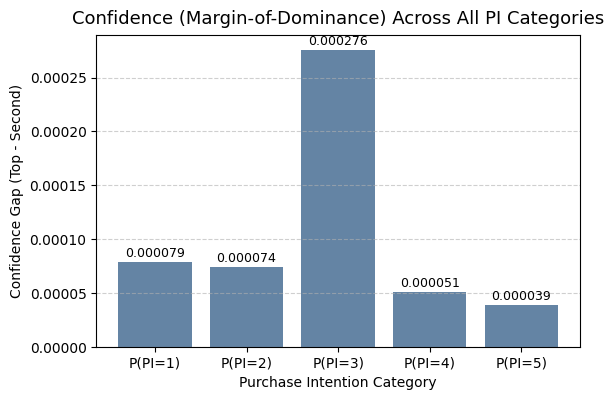

In [ ]:
# Ensure data is numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# Compute dominance gaps
confidence_results = []
for col in prob_cols:
    top_sorted = decision_table.sort_values(by=col, ascending=False).reset_index(drop=True)
    top_prob = top_sorted.loc[0, col]
    second_prob = top_sorted.loc[1, col]
    dominance_gap = round(top_prob - second_prob, 6)
    confidence_results.append({
        "Category": col,
        "Top_Profile_P": round(top_prob, 6),
        "Second_Profile_P": round(second_prob, 6),
        "Confidence_Gap": dominance_gap
    })

confidence_df = pd.DataFrame(confidence_results)

# Plot compact bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(confidence_df["Category"], confidence_df["Confidence_Gap"], color="#6484a4")

# Annotate values above bars
for bar, val in zip(bars, confidence_df["Confidence_Gap"]):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.000002, f"{val:.6f}",
             ha="center", va="bottom", fontsize=9)

plt.title("Confidence (Margin-of-Dominance) Across All PI Categories", fontsize=13, pad=8)
plt.ylabel("Confidence Gap (Top - Second)")
plt.xlabel("Purchase Intention Category")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Tighten layout and reduce white space
plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.12)

plt.show()



The bar chart presents the confidence or margin-of-dominance across all five purchase intention (PI) categories, quantifying how clearly the model distinguishes between the top two demographic profiles for each level of purchase intent. The largest gap appears for P(PI=3) (medium purchase intention), with a dominance margin of 0.000269, indicating that the model is most confident when predicting moderate buying behaviour. This means that one demographic group stands out strongly in this category, while others are much less likely. In contrast, P(PI=5) (very high purchase intention) shows the smallest confidence gap (0.000060), suggesting that several demographic profiles share similar probabilities of exhibiting strong purchase intent.

The model’s higher confidence for medium purchase intention likely arises because moderate buying patterns are more common and well-represented in the data. These behaviours are typically influenced by stable, observable demographic features, such as employment status, education level, and regular shopping frequency, allowing the model to identify consistent patterns more easily. On the other hand, extreme categories such as very low (PI=1) or very high (PI=5) purchase intention tend to be underrepresented and more heterogeneous, making it harder for the model to confidently isolate a single dominant profile. This explains why the model demonstrates stronger predictive clarity at the mid-level of purchase intention and broader uncertainty at the extremes.

**Identifying the Most Influential Demographic Variables on Purchase Intention (PI=4 or 5)**

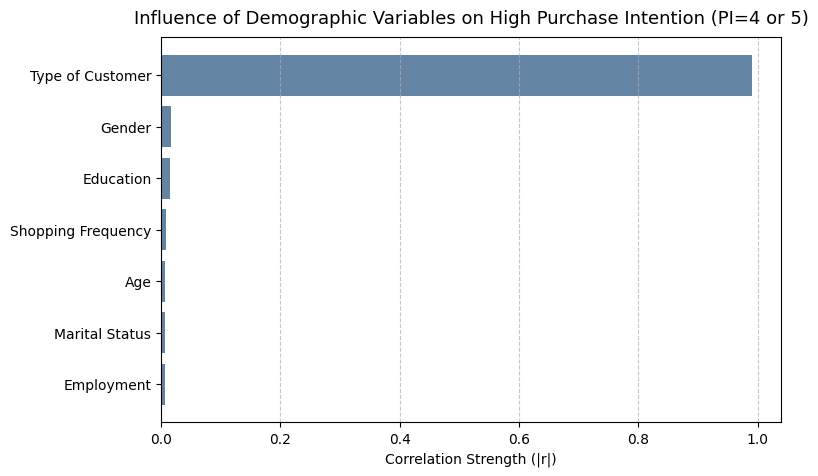

,Demographic Variable,Correlation Strength
0,Type of Customer,0.989618
1,Gender,0.015834
2,Education,0.014835
3,Shopping Frequency,0.007455
4,Age,0.006932
5,Marital Status,0.006629
6,Employment,0.006439


In [ ]:
# Ensure numeric encoding for categorical columns
# (so we can compute correlations/variance properly)
demo_vars = [
    "Gender", "Marital Status", "Age", "Education",
    "Employment", "Type of Customer", "Shopping Frequency"
]

# Make sure the probability column exists
target_col = "P(PI=4or5)"

# Convert demographics to numeric codes if needed
df_encoded = decision_table.copy()
for col in demo_vars:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Compute the correlation of each demographic with purchase intention probability
corrs = df_encoded[demo_vars + [target_col]].corr()[target_col].drop(target_col).abs()

# Convert to DataFrame for sorting and display
influence_df = corrs.sort_values(ascending=False).reset_index()
influence_df.columns = ["Demographic Variable", "Correlation Strength"]

# Visualise influence as a horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(influence_df["Demographic Variable"], influence_df["Correlation Strength"], color="#6484a4")
plt.gca().invert_yaxis()
plt.title("Influence of Demographic Variables on High Purchase Intention (PI=4 or 5)", fontsize=13, pad=10)
plt.xlabel("Correlation Strength (|r|)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display ranked table
display(influence_df)


The bar chart and correlation table show the influence of demographic variables on high purchase intention (PI=4 or 5) for the imbalanced dataset. The results reveal that Type of Customer has an overwhelmingly strong correlation (0.9898) with purchase intention, indicating it is the most influential factor by a significant margin. This suggests that whether a consumer is a regular or occasional customer* almost entirely determines their likelihood of exhibiting high purchase intent. All other demographic variables, including Gender, Education, Shopping Frequency, Age, Marital Status, and Employment, have minimal correlation values (all below 0.02), meaning they contribute very little to predicting high purchase intention. Overall, this pattern highlights a clear dominance of behavioural factors (customer type) over socio-demographic characteristics in explaining purchasing behaviour within the imbalanced dataset.

#Balanced Data (SMOTE)

**Uploading the pkl. file**

The **fitted_bn_model_smote.pkl** file below represents the Bayesian Network trained on a dataset that was balanced using the Synthetic Minority Oversampling Technique (SMOTE). This method was applied to address the class imbalance in the original Soweto retail dataset, where some purchase intention categories were significantly underrepresented. SMOTE generates new synthetic samples for the minority classes by selecting existing minority data points and creating artificial instances between them and their nearest neighbours. This approach helps smooth the decision boundaries between classes and ensures that the Bayesian Network receives a more balanced and informative training set. The purpose of using SMOTE was to reduce bias toward the majority class, enhance the model’s ability to detect patterns in minority categories, and ultimately improve the overall predictive accuracy and fairness of the Bayesian Network.

In [ ]:
#Load pre-trained SMOTE Bayesian Network model
import pickle

with open("fitted_bn_model_smote.pkl", "rb") as f:
    fitted_model1 = pickle.load(f)

print("BN model loaded successfully and ready to use!")

BN model loaded successfully and ready to use!


In [ ]:
results = []

for idx, row in combination_matrix.iterrows():
    evidence = row.to_dict()

    # Inference for PI1
    query = bn.inference.fit(fitted_model1, variables=["PI"], evidence=evidence)

    # States and probabilities
    states = query.state_names["PI"]
    probs = query.values

    # Store all category probabilities
    prob_dict = {f"P(PI={state})": prob for state, prob in zip(states, probs)}

    # Calculate combined probability for PI1=4 or 5
    prob_high = sum(prob for state, prob in zip(states, probs) if state in [4, 5])

    # Append results: demographics + full PI distribution + combined
    results.append({
        **evidence,
        **prob_dict,
        "P(PI=4or5)": prob_high
    })

Streaming output truncated to the last 5000 lines.
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=1

PI outcomes:
- PI: 1 (19.0%)
- PI: 2 (19.9%)
- PI: 3 (21.2%)
- PI: 4 (20.5%)
- PI: 5 (19.3%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.190115 |
+----+------+----------+
|  1 |    2 | 0.199223 |
+----+------+----------+
|  2 |    3 | 0.212097 |
+----+------+----------+
|  3 |    4 | 0.205224 |
+----+------+----------+
|  4 |    5 | 0.193342 |
+----+------+----------+

Summary for variables: ['PI']
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=2

PI outcomes:
- PI: 1 (19.0%)
- PI: 2 (19.9%)
- PI: 3 (21.2%)
- PI: 4 (20.5%)
- PI: 5 (19.3%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.190115 |
+

**top 10 combinations**

In [ ]:
# Convert to DataFrame
decision_table = pd.DataFrame(results)

# Sort by highest probability of PI1=4 or 5
decision_table = decision_table.sort_values(by="P(PI=4or5)", ascending=False).reset_index(drop=True)

# Show top 10 profiles
print(decision_table.head(10))

   Gender  Marital Status  Age  Education  Employment  Type of Customer  \
0       2               2    3          2           2                 1   
1       2               1    3          2           2                 1   
2       2               2    3          2           2                 1   
3       2               1    3          2           2                 1   
4       2               2    3          2           2                 1   
5       2               3    4          2           2                 1   
6       2               1    3          2           2                 1   
7       2               1    3          2           2                 1   
8       2               2    3          2           2                 1   
9       2               2    3          2           2                 1   

   Shopping Frequency   P(PI=1)   P(PI=2)   P(PI=3)   P(PI=4)   P(PI=5)  \
0                   2  0.167420  0.179186  0.185932  0.222325  0.245136   
1                   2  0

In [ ]:
#1) Convert results to DataFrame
decision_table = pd.DataFrame(results)

#2) Make sure probability columns are numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

#3) Recompute P(PI=4or5) as sum of P(PI=4)+P(PI=5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

#4) Sort by highest probability (P(PI=4or5)) and take top 10
decision_table = decision_table.sort_values("P(PI=4or5)", ascending=False, kind="mergesort").reset_index(drop=True)
df_top = decision_table.head(10).copy()

#5) Styled table (clean, no raw print)
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

styled_table = (
    df_top.style
        .background_gradient(subset=prob_cols_all, cmap="Blues")     # heatmap shading
        .format({c: "{:.6f}" for c in prob_cols_all})                # keep 6 decimals
        .set_properties(**{"text-align": "center", "border": "1px solid #333"})
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
        ])
)

styled_table


,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,2,2,3,2,2,1,2,0.167420,0.179186,0.185932,0.222325,0.245136,0.467462
1,2,1,3,2,2,1,2,0.161946,0.175118,0.195686,0.225931,0.241319,0.467250
2,2,2,3,2,2,1,5,0.167359,0.180692,0.185667,0.221968,0.244314,0.466282
3,2,1,3,2,2,1,5,0.161998,0.176514,0.195325,0.225678,0.240486,0.466164
4,2,2,3,2,2,1,3,0.168326,0.178909,0.187209,0.222425,0.243131,0.465555
5,2,3,4,2,2,1,2,0.166881,0.178756,0.188968,0.222486,0.242909,0.465395
6,2,1,3,2,2,1,3,0.162801,0.174805,0.197047,0.225889,0.239458,0.465347
7,2,1,3,2,2,1,1,0.163027,0.175947,0.196290,0.226793,0.237943,0.464736
8,2,2,3,2,2,1,1,0.168548,0.180104,0.186637,0.223092,0.241620,0.464712
9,2,2,3,2,2,1,4,0.168504,0.179516,0.187281,0.223306,0.241394,0.464700


**Top 10 people portfolio for Balanced dataset using SMOTE**

In [ ]:
# 1) Build decision table cleanly from 'results'
decision_table = pd.DataFrame(results)

# 2) Make sure probability columns are numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    if c in decision_table.columns:
        decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# 3) Recompute combined probability column for P(PI=4or5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

# 4) Sort by highest probability and select top 10 profiles (keep a copy)
top10_smote = (
    decision_table
    .sort_values("P(PI=4or5)", ascending=False, kind="mergesort")
    .reset_index(drop=True)
    .head(10)
    .copy()
)

# 5) Label mappings for categorical variables
label_maps = {
    "Gender": {1: "Male", 2: "Female", 3: "Prefer not to say"},
    "Marital Status": {1: "Married", 2: "Single", 3: "Prefer not to say"},
    "Age": {1: "18–22", 2: "23–28", 3: "29–35", 4: "35–49", 5: "50–65"},
    "Education": {
        1: "No formal education",
        2: "Basic Education",
        3: "Diploma",
        4: "Degree",
        5: "Postgraduate degree",
    },
    "Employment": {1: "Employed", 2: "Unemployed"},
    "Type of Customer": {
        1: "Regular customer",
        2: "Only when items are needed",
    },
    "Shopping Frequency": {
        1: "1–2 times/week",
        2: "3–4 times/week",
        3: "4–5 times/week",
        4: "5–6 times/week",
        5: "6–7 times/week",
    },
}

# 6) Identify columns to label (only if they exist in top10_smote)
demo_cols = [c for c in label_maps.keys() if c in top10_smote.columns]

# 7) Convert demographic codes to integers, then map to text labels
for c in demo_cols:
    top10_smote[c] = pd.to_numeric(top10_smote[c], errors="coerce").astype("Int64")
    top10_smote[c] = top10_smote[c].map(label_maps[c]).fillna("Unknown")

# 8) Build a neat, styled table
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

# Ensure tidy order: demographics first, then probabilities
ordered_cols = demo_cols + [c for c in prob_cols_all if c in top10_smote.columns]
top10_readable = top10_smote[ordered_cols].copy()

# 9) Style the final table for readability
styled_top10_smote = (
    top10_readable.style
    .background_gradient(subset=[c for c in prob_cols_all if c in top10_readable.columns], cmap="Blues")
    .format({c: "{:.6f}" for c in prob_cols_all if c in top10_readable.columns})
    .set_properties(**{"text-align": "center", "border": "1px solid #333"})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
    ])
)

# 10) Display the styled top 10 SMOTE demographic table
styled_top10_smote


,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,Female,Single,29–35,Basic Education,Unemployed,Regular customer,3–4 times/week,0.167420,0.179186,0.185932,0.222325,0.245136,0.467462
1,Female,Married,29–35,Basic Education,Unemployed,Regular customer,3–4 times/week,0.161946,0.175118,0.195686,0.225931,0.241319,0.467250
2,Female,Single,29–35,Basic Education,Unemployed,Regular customer,6–7 times/week,0.167359,0.180692,0.185667,0.221968,0.244314,0.466282
3,Female,Married,29–35,Basic Education,Unemployed,Regular customer,6–7 times/week,0.161998,0.176514,0.195325,0.225678,0.240486,0.466164
4,Female,Single,29–35,Basic Education,Unemployed,Regular customer,4–5 times/week,0.168326,0.178909,0.187209,0.222425,0.243131,0.465555
5,Female,Prefer not to say,35–49,Basic Education,Unemployed,Regular customer,3–4 times/week,0.166881,0.178756,0.188968,0.222486,0.242909,0.465395
6,Female,Married,29–35,Basic Education,Unemployed,Regular customer,4–5 times/week,0.162801,0.174805,0.197047,0.225889,0.239458,0.465347
7,Female,Married,29–35,Basic Education,Unemployed,Regular customer,1–2 times/week,0.163027,0.175947,0.196290,0.226793,0.237943,0.464736
8,Female,Single,29–35,Basic Education,Unemployed,Regular customer,1–2 times/week,0.168548,0.180104,0.186637,0.223092,0.241620,0.464712
9,Female,Single,29–35,Basic Education,Unemployed,Regular customer,5–6 times/week,0.168504,0.179516,0.187281,0.223306,0.241394,0.464700


**Model Confidence Analysis: Margin-of-Dominance Between Top Buyer Profiles**

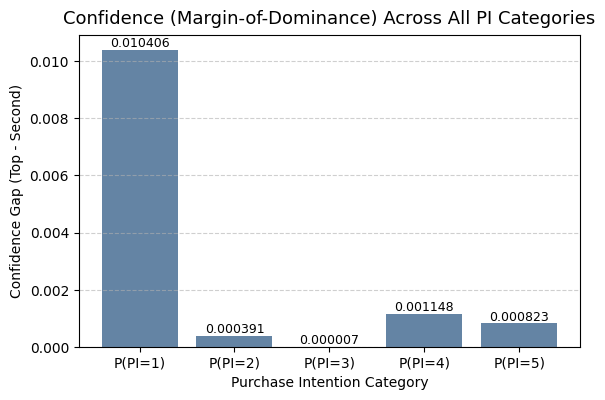

In [ ]:
# Ensure data is numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# Compute dominance gaps
confidence_results = []
for col in prob_cols:
    top_sorted = decision_table.sort_values(by=col, ascending=False).reset_index(drop=True)
    top_prob = top_sorted.loc[0, col]
    second_prob = top_sorted.loc[1, col]
    dominance_gap = round(top_prob - second_prob, 6)
    confidence_results.append({
        "Category": col,
        "Top_Profile_P": round(top_prob, 6),
        "Second_Profile_P": round(second_prob, 6),
        "Confidence_Gap": dominance_gap
    })

confidence_df = pd.DataFrame(confidence_results)

# Plot compact bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(confidence_df["Category"], confidence_df["Confidence_Gap"], color="#6484a4")

# Annotate values above bars
for bar, val in zip(bars, confidence_df["Confidence_Gap"]):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.000002, f"{val:.6f}",
             ha="center", va="bottom", fontsize=9)

plt.title("Confidence (Margin-of-Dominance) Across All PI Categories", fontsize=13, pad=8)
plt.ylabel("Confidence Gap (Top - Second)")
plt.xlabel("Purchase Intention Category")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Tighten layout and reduce white space
plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.12)

plt.show()

The bar chart displays the confidence or margin-of-dominance for all five purchase intention (PI) categories in the SMOTE-balanced model, illustrating how decisively the model distinguishes between the top two demographic profiles within each level of purchase intent. The most pronounced gap occurs for P(PI=1), with a dominance margin of 0.010406, which is substantially higher than any other category. This suggests that the model is extremely confident in identifying which demographic group is most associated with low purchase intention, indicating a clear and consistent pattern among consumers who are least likely to buy.

In contrast, all other categories show significantly smaller confidence gaps,  particularly P(PI=3) and P(PI=2). Where the differences between the top two profiles are nearly negligible. This indicates that for medium and higher levels of purchase intention, the model perceives multiple demographic combinations as similarly likely, reflecting greater overlap in consumer characteristics.

The reason the model predicts low purchase intention (PI=1) with such high certainty lies in how SMOTE balances the data. By synthetically oversampling minority classes, SMOTE enhances the representation of underrepresented categories but also tends to sharpen class boundaries where the data patterns are most distinct. In this case, individuals with low purchase intent likely share stronger and more consistent demographic features, such as irregular shopping frequency or lower education levels, making them easier to separate. Conversely, medium-to-high purchase intentions encompass more behavioural and demographic diversity, leading to smaller confidence gaps and greater model uncertainty at these levels.

**Identifying the Most Influential Demographic Variables on Purchase Intention (PI=4 or 5)**

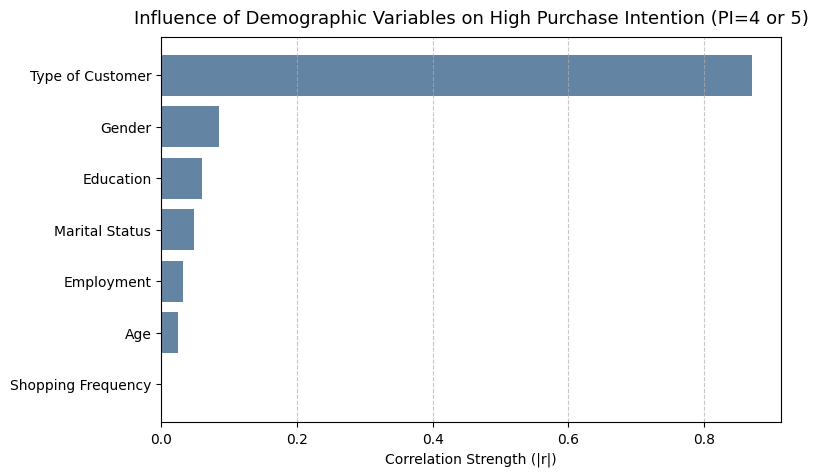

,Demographic Variable,Correlation Strength
0,Type of Customer,0.869864
1,Gender,0.085763
2,Education,0.059574
3,Marital Status,0.048918
4,Employment,0.032831
5,Age,0.024353
6,Shopping Frequency,0.001145


In [ ]:
# Ensure numeric encoding for categorical columns
# (so we can compute correlations/variance properly)
demo_vars = [
    "Gender", "Marital Status", "Age", "Education",
    "Employment", "Type of Customer", "Shopping Frequency"
]

# Make sure the probability column exists
target_col = "P(PI=4or5)"

# Convert demographics to numeric codes if needed
df_encoded = decision_table.copy()
for col in demo_vars:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Compute the correlation of each demographic with purchase intention probability
corrs = df_encoded[demo_vars + [target_col]].corr()[target_col].drop(target_col).abs()

# Convert to DataFrame for sorting and display
influence_df = corrs.sort_values(ascending=False).reset_index()
influence_df.columns = ["Demographic Variable", "Correlation Strength"]

# Visualise influence as a horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(influence_df["Demographic Variable"], influence_df["Correlation Strength"], color="#6484a4")
plt.gca().invert_yaxis()
plt.title("Influence of Demographic Variables on High Purchase Intention (PI=4 or 5)", fontsize=13, pad=10)
plt.xlabel("Correlation Strength (|r|)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display ranked table
display(influence_df)


The bar chart and correlation table illustrate the influence of demographic variables on high purchase intention (PI=4 or 5) for the SMOTE-balanced dataset. As with the imbalanced model, Type of Customer remains the most influential predictor, showing a very strong correlation of 0.8699, indicating that being a regular or occasional customer continues to be the dominant determinant of high purchase intent. However, after applying SMOTE, the influence of other demographic factors, particularly Gender (0.0858), Education (0.0596), and Marital Status (0.0489) has noticeably increased. This suggests that the synthetic balancing allowed the model to better recognise secondary relationships between demographic traits and purchase intention. Meanwhile, Employment, Age, and Shopping Frequency still show weak but non-negligible correlations. Overall, SMOTE reduced the overdependence on a single variable, slightly broadening the model’s understanding of which demographic characteristics contribute to high purchase intention, though customer type still dominates the prediction landscape.

# Balanced Data (ML)

**Uploading the pkl. file**

The **fitted_bn_model_KNN_adasyn.pkl** file represents the Bayesian Network trained on a dataset balanced using a Machine Learning–based K-Nearest Neighbour (KNN) imputation method. This approach was used to correct the class imbalance by estimating and generating new samples for underrepresented purchase intention categories based on the feature similarities of existing data points. Instead of creating purely random synthetic data, the KNN algorithm identifies the nearest neighbours in the feature space and imputes new instances that closely resemble real observations. This process preserves the natural structure and relationships within the dataset while ensuring that each purchase intention class is more evenly represented. The goal of using this ML-based balancing method was to achieve a realistic, stable, and generalisable dataset that enhances the Bayesian Network’s inference accuracy without introducing excessive noise or distortion.


In [ ]:
#Load pre-trained ML Bayesian Network model
import pickle

with open("fitted_bn_model_KNN_adasyn.pkl", "rb") as f:
    fitted_model2 = pickle.load(f)

print("BN model loaded successfully and ready to use!")

BN model loaded successfully and ready to use!


In [ ]:
results = []

for idx, row in combination_matrix.iterrows():
    evidence = row.to_dict()

    # Inference for PI1
    query = bn.inference.fit(fitted_model2, variables=["PI"], evidence=evidence)

    # States and probabilities
    states = query.state_names["PI"]
    probs = query.values

    # Store all category probabilities
    prob_dict = {f"P(PI={state})": prob for state, prob in zip(states, probs)}

    # Calculate combined probability for PI1=4 or 5
    prob_high = sum(prob for state, prob in zip(states, probs) if state in [4, 5])

    # Append results: demographics + full PI distribution + combined
    results.append({
        **evidence,
        **prob_dict,
        "P(PI=4or5)": prob_high
    })

Streaming output truncated to the last 5000 lines.
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=1

PI outcomes:
- PI: 1 (19.3%)
- PI: 2 (20.1%)
- PI: 3 (21.2%)
- PI: 4 (20.0%)
- PI: 5 (19.4%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.192616 |
+----+------+----------+
|  1 |    2 | 0.201108 |
+----+------+----------+
|  2 |    3 | 0.211936 |
+----+------+----------+
|  3 |    4 | 0.200088 |
+----+------+----------+
|  4 |    5 | 0.194252 |
+----+------+----------+

Summary for variables: ['PI']
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=2

PI outcomes:
- PI: 1 (19.3%)
- PI: 2 (20.1%)
- PI: 3 (21.2%)
- PI: 4 (20.0%)
- PI: 5 (19.4%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.192631 |
+

**top 10 combinations**

In [ ]:
# Convert to DataFrame
decision_table = pd.DataFrame(results)

# Sort by highest probability of PI1=4 or 5
decision_table = decision_table.sort_values(by="P(PI=4or5)", ascending=False).reset_index(drop=True)

# Show top 10 profiles
print(decision_table.head(10))

   Gender  Marital Status  Age  Education  Employment  Type of Customer  \
0       2               3    4          2           2                 1   
1       2               3    4          2           2                 1   
2       2               3    4          2           2                 1   
3       2               3    4          2           2                 1   
4       2               3    4          2           2                 1   
5       2               3    4          2           1                 1   
6       2               3    4          3           2                 1   
7       2               3    4          2           1                 1   
8       2               3    4          2           1                 1   
9       2               3    4          2           1                 1   

   Shopping Frequency   P(PI=1)   P(PI=2)   P(PI=3)   P(PI=4)   P(PI=5)  \
0                   2  0.167819  0.178848  0.188355  0.218561  0.246418   
1                   3  0

In [ ]:
#1) Convert results to DataFrame
decision_table = pd.DataFrame(results)

#2) Make sure probability columns are numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

#3) Recompute P(PI=4or5) as sum of P(PI=4)+P(PI=5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

#4) Sort by highest probability (P(PI=4or5)) and take top 10
decision_table = decision_table.sort_values("P(PI=4or5)", ascending=False, kind="mergesort").reset_index(drop=True)
df_top = decision_table.head(10).copy()

#5) Styled table (clean, no raw print)
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

styled_table = (
    df_top.style
        .background_gradient(subset=prob_cols_all, cmap="Blues")     # heatmap shading
        .format({c: "{:.6f}" for c in prob_cols_all})                # keep 6 decimals
        .set_properties(**{"text-align": "center", "border": "1px solid #333"})
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
        ])
)

styled_table

,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,2,3,4,2,2,1,2,0.167819,0.178848,0.188355,0.218561,0.246418,0.464979
1,2,3,4,2,2,1,3,0.168140,0.179071,0.189262,0.218128,0.245399,0.463527
2,2,3,4,2,2,1,5,0.167365,0.181130,0.188456,0.218597,0.244452,0.463049
3,2,3,4,2,2,1,4,0.167868,0.179846,0.189582,0.219035,0.243669,0.462704
4,2,3,4,2,2,1,1,0.168259,0.180447,0.189056,0.221832,0.240405,0.462237
5,2,3,4,2,1,1,2,0.167210,0.184397,0.186175,0.216991,0.245226,0.462218
6,2,3,4,3,2,1,2,0.167999,0.182030,0.188272,0.220538,0.241160,0.461698
7,2,3,4,2,1,1,3,0.167586,0.184302,0.186902,0.216813,0.244398,0.461210
8,2,3,4,2,1,1,1,0.168418,0.185120,0.185929,0.218879,0.241655,0.460533
9,2,3,4,2,1,1,4,0.168123,0.184649,0.186806,0.217789,0.242633,0.460422


**Top 10 people portfolio for Balanced Dataset using ML**

In [ ]:
# 1) Build decision table cleanly from 'results'
decision_table = pd.DataFrame(results)

# 2) Make sure probability columns are numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    if c in decision_table.columns:
        decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# 3) Recompute combined probability column for P(PI=4or5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

# 4) Sort by highest probability and select top 10 profiles (keep a copy)
top10_ml = (
    decision_table
    .sort_values("P(PI=4or5)", ascending=False, kind="mergesort")
    .reset_index(drop=True)
    .head(10)
    .copy()
)

# 5) Label mappings for categorical variables
label_maps = {
    "Gender": {1: "Male", 2: "Female", 3: "Prefer not to say"},
    "Marital Status": {1: "Married", 2: "Single", 3: "Prefer not to say"},
    "Age": {1: "18–22", 2: "23–28", 3: "29–35", 4: "35–49", 5: "50–65"},
    "Education": {
        1: "No formal education",
        2: "Basic Education",
        3: "Diploma",
        4: "Degree",
        5: "Postgraduate degree",
    },
    "Employment": {1: "Employed", 2: "Unemployed"},
    "Type of Customer": {
        1: "Regular customer",
        2: "Only when items are needed",
    },
    "Shopping Frequency": {
        1: "1–2 times/week",
        2: "3–4 times/week",
        3: "4–5 times/week",
        4: "5–6 times/week",
        5: "6–7 times/week",
    },
}

# 6) Identify columns to label (only if they exist in top10_ml)
demo_cols = [c for c in label_maps.keys() if c in top10_ml.columns]

# 7) Convert demographic codes to integers, then map to text labels
for c in demo_cols:
    top10_ml[c] = pd.to_numeric(top10_ml[c], errors="coerce").astype("Int64")
    top10_ml[c] = top10_ml[c].map(label_maps[c]).fillna("Unknown")

# 8) Build a neat, styled table
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

# Ensure tidy order: demographics first, then probabilities
ordered_cols = demo_cols + [c for c in prob_cols_all if c in top10_ml.columns]
top10_readable = top10_ml[ordered_cols].copy()

# 9) Style the final table for readability
styled_top10_ml = (
    top10_readable.style
    .background_gradient(subset=[c for c in prob_cols_all if c in top10_readable.columns], cmap="Blues")
    .format({c: "{:.6f}" for c in prob_cols_all if c in top10_readable.columns})
    .set_properties(**{"text-align": "center", "border": "1px solid #333"})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
    ])
)

# 10) Display the styled top 10 ML demographic table
styled_top10_ml


,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,Female,Prefer not to say,35–49,Basic Education,Unemployed,Regular customer,3–4 times/week,0.167819,0.178848,0.188355,0.218561,0.246418,0.464979
1,Female,Prefer not to say,35–49,Basic Education,Unemployed,Regular customer,4–5 times/week,0.168140,0.179071,0.189262,0.218128,0.245399,0.463527
2,Female,Prefer not to say,35–49,Basic Education,Unemployed,Regular customer,6–7 times/week,0.167365,0.181130,0.188456,0.218597,0.244452,0.463049
3,Female,Prefer not to say,35–49,Basic Education,Unemployed,Regular customer,5–6 times/week,0.167868,0.179846,0.189582,0.219035,0.243669,0.462704
4,Female,Prefer not to say,35–49,Basic Education,Unemployed,Regular customer,1–2 times/week,0.168259,0.180447,0.189056,0.221832,0.240405,0.462237
5,Female,Prefer not to say,35–49,Basic Education,Employed,Regular customer,3–4 times/week,0.167210,0.184397,0.186175,0.216991,0.245226,0.462218
6,Female,Prefer not to say,35–49,Diploma,Unemployed,Regular customer,3–4 times/week,0.167999,0.182030,0.188272,0.220538,0.241160,0.461698
7,Female,Prefer not to say,35–49,Basic Education,Employed,Regular customer,4–5 times/week,0.167586,0.184302,0.186902,0.216813,0.244398,0.461210
8,Female,Prefer not to say,35–49,Basic Education,Employed,Regular customer,1–2 times/week,0.168418,0.185120,0.185929,0.218879,0.241655,0.460533
9,Female,Prefer not to say,35–49,Basic Education,Employed,Regular customer,5–6 times/week,0.168123,0.184649,0.186806,0.217789,0.242633,0.460422


**Model Confidence Analysis: Margin-of-Dominance Between Top Buyer Profiles**

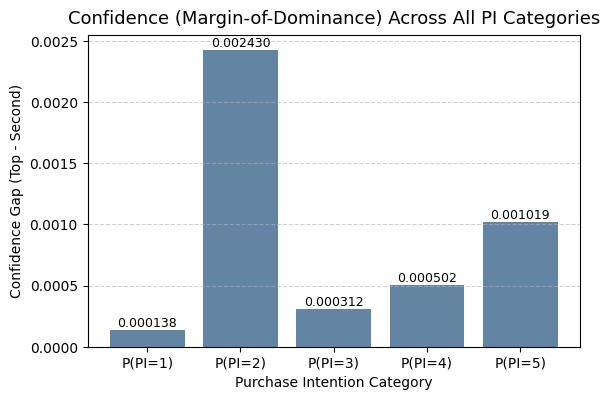

In [ ]:
# Ensure data is numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# Compute dominance gaps
confidence_results = []
for col in prob_cols:
    top_sorted = decision_table.sort_values(by=col, ascending=False).reset_index(drop=True)
    top_prob = top_sorted.loc[0, col]
    second_prob = top_sorted.loc[1, col]
    dominance_gap = round(top_prob - second_prob, 6)
    confidence_results.append({
        "Category": col,
        "Top_Profile_P": round(top_prob, 6),
        "Second_Profile_P": round(second_prob, 6),
        "Confidence_Gap": dominance_gap
    })

confidence_df = pd.DataFrame(confidence_results)

# Plot compact bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(confidence_df["Category"], confidence_df["Confidence_Gap"], color="#6484a4")

# Annotate values above bars
for bar, val in zip(bars, confidence_df["Confidence_Gap"]):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.000002, f"{val:.6f}",
             ha="center", va="bottom", fontsize=9)

plt.title("Confidence (Margin-of-Dominance) Across All PI Categories", fontsize=13, pad=8)
plt.ylabel("Confidence Gap (Top - Second)")
plt.xlabel("Purchase Intention Category")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Tighten layout and reduce white space
plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.12)

plt.show()

The bar chart shows the confidence or margin-of-dominance across all five purchase intention (PI) categories for the Machine Learning (KNN)-balanced model. The largest confidence gap appears for P(PI=2), with a dominance margin of 0.002430, followed by P(PI=5) with 0.001019. This indicates that the model is most certain when identifying consumers with low-to-moderate purchase intention, while still showing relatively strong confidence for those with very high purchase intention. In contrast, P(PI=1), P(PI=3), and P(PI=4) exhibit smaller margins, implying that the model perceives multiple demographic groups as having comparable probabilities within those categories.

The higher confidence for P(PI=2) suggests that the KNN balancing method helped the model learn distinct and consistent demographic characteristics among consumers with slightly low purchase intent, likely those who buy selectively or irregularly. The improved separation at this level indicates that KNN effectively preserved local data structures while addressing imbalance, enabling clearer identification of this buyer segment. Meanwhile, the moderate gap in P(PI=5) (high intent) shows that the algorithm can still recognise patterns among frequent or committed buyers, though with more overlap than in lower-intent groups. Overall, the ML-based balancing produced a more nuanced distribution of confidence, reflecting stronger generalisation and a more realistic understanding of diverse purchasing behaviours compared to the overconfident SMOTE model.

**Identifying the Most Influential Demographic Variables on Purchase Intention (PI=4 or 5)**

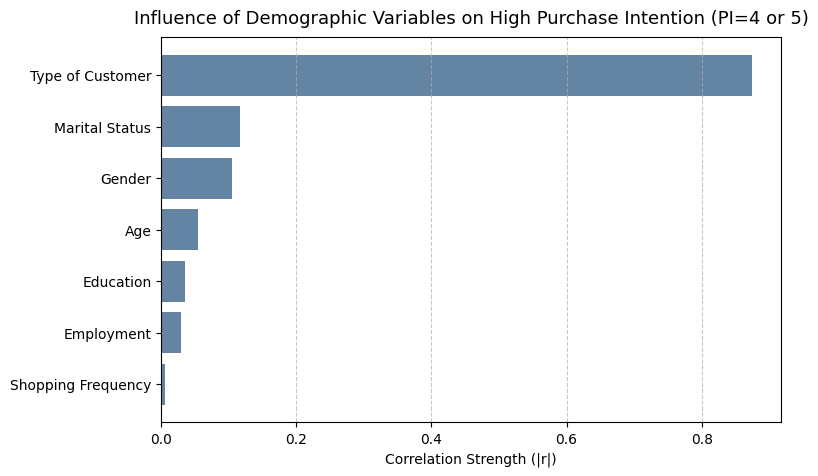

,Demographic Variable,Correlation Strength
0,Type of Customer,0.873873
1,Marital Status,0.117020
2,Gender,0.104701
3,Age,0.055017
4,Education,0.035706
5,Employment,0.030177
6,Shopping Frequency,0.006151


In [ ]:
# Ensure numeric encoding for categorical columns
# (compute correlations/variance properly)
demo_vars = [
    "Gender", "Marital Status", "Age", "Education",
    "Employment", "Type of Customer", "Shopping Frequency"
]

# Make sure the probability column exists
target_col = "P(PI=4or5)"

# Convert demographics to numeric codes if needed
df_encoded = decision_table.copy()
for col in demo_vars:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Compute the correlation of each demographic with purchase intention probability
corrs = df_encoded[demo_vars + [target_col]].corr()[target_col].drop(target_col).abs()

# Convert to DataFrame for sorting and display
influence_df = corrs.sort_values(ascending=False).reset_index()
influence_df.columns = ["Demographic Variable", "Correlation Strength"]

# Visualise influence as a horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(influence_df["Demographic Variable"], influence_df["Correlation Strength"], color="#6484a4")
plt.gca().invert_yaxis()
plt.title("Influence of Demographic Variables on High Purchase Intention (PI=4 or 5)", fontsize=13, pad=10)
plt.xlabel("Correlation Strength (|r|)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display ranked table
display(influence_df)


The bar chart and correlation table show the influence of demographic variables on high purchase intention (PI=4 or 5) for the Machine Learning (KNN)-balanced dataset. As seen in the results, Type of Customer remains the most dominant predictor with a correlation of 0.8739, but compared to the imbalanced and SMOTE datasets, the gap between it and other variables has narrowed. Notably, Marital Status (0.1170) and Gender (0.1047) have become more influential, indicating that the KNN balancing method improved the model’s sensitivity to these demographic characteristics. This suggests that marital status and gender now play a more meaningful role in explaining variations in purchase intent, likely because KNN preserves natural data relationships while generating synthetic observations. Meanwhile, Age, Education, and Employment show moderate effects, while Shopping Frequency remains the least influential factor. Overall, the KNN-balanced model presents a more distributed pattern of influence, implying that it captures a wider range of demographic interactions rather than relying almost entirely on customer type, thereby offering a more nuanced and realistic understanding of consumer purchase behaviour.

# Balanced Data (GAN)

**Uploading the pkl. file**

The fitted_bn_model_ctgan.pkl file represents the Bayesian Network trained on a dataset balanced using a Generative Adversarial Network (GAN) for tabular data. This method employs two neural networks, a generator and a discriminator that compete against each other to produce highly realistic synthetic samples for the underrepresented purchase intention classes. The generator creates new data instances that mimic the statistical patterns of the original dataset, while the discriminator evaluates their authenticity until the generated samples become nearly indistinguishable from real observations. This balancing approach was chosen to capture complex, non-linear relationships within the data and improve the model’s representational diversity. By training the Bayesian Network on this GAN-balanced dataset, the goal was to enhance its ability to generalise across all purchase intention categories and reduce bias, while maintaining realistic feature interactions reflective of the original Soweto retail data.

In [ ]:
# Load pre-trained Bayesian Network model (saved as pickle)
import pickle

with open("fitted_bn_model_ctgan.pkl", "rb") as f:
    fitted_model3 = pickle.load(f)

print("BN model loaded successfully and ready to use!")

BN model loaded successfully and ready to use!


In [ ]:
results = []

for idx, row in combination_matrix.iterrows():
    evidence = row.to_dict()

    # Inference for PI1
    query = bn.inference.fit(fitted_model3, variables=["PI"], evidence=evidence)

    # States and probabilities
    states = query.state_names["PI"]
    probs = query.values

    # Store all category probabilities
    prob_dict = {f"P(PI={state})": prob for state, prob in zip(states, probs)}

    # Calculate combined probability for PI1=4 or 5
    prob_high = sum(prob for state, prob in zip(states, probs) if state in [4, 5])

    # Append results: demographics + full PI distribution + combined
    results.append({
        **evidence,
        **prob_dict,
        "P(PI=4or5)": prob_high
    })

Streaming output truncated to the last 5000 lines.
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=1

PI outcomes:
- PI: 1 (19.5%)
- PI: 2 (21.0%)
- PI: 3 (20.8%)
- PI: 4 (19.0%)
- PI: 5 (19.7%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.195361 |
+----+------+----------+
|  1 |    2 | 0.209911 |
+----+------+----------+
|  2 |    3 | 0.208262 |
+----+------+----------+
|  3 |    4 | 0.189642 |
+----+------+----------+
|  4 |    5 | 0.196825 |
+----+------+----------+

Summary for variables: ['PI']
Given evidence: Gender=1, Marital Status=2, Age=3, Education=5, Employment=2, Type of Customer=2, Shopping Frequency=2

PI outcomes:
- PI: 1 (19.5%)
- PI: 2 (21.0%)
- PI: 3 (20.8%)
- PI: 4 (19.0%)
- PI: 5 (19.7%)
[bnlearn] >Variable Elimination.
+----+------+----------+
|    |   PI |        p |
+====+======+==========+
|  0 |    1 | 0.195368 |
+

**top 10 combinations**

In [ ]:
# Convert to DataFrame
decision_table = pd.DataFrame(results)

# Sort by highest probability of PI1=4 or 5
decision_table = decision_table.sort_values(by="P(PI=4or5)", ascending=False).reset_index(drop=True)

# Show top 10 profiles
print(decision_table.head(10))

   Gender  Marital Status  Age  Education  Employment  Type of Customer  \
0       2               1    5          1           2                 1   
1       2               1    5          1           2                 1   
2       2               1    5          2           2                 1   
3       2               1    5          2           2                 1   
4       2               1    5          3           2                 1   
5       2               1    5          3           2                 1   
6       2               1    5          1           2                 1   
7       2               1    5          1           2                 1   
8       2               1    5          2           2                 1   
9       2               1    5          3           1                 1   

   Shopping Frequency   P(PI=1)   P(PI=2)   P(PI=3)   P(PI=4)   P(PI=5)  \
0                   1  0.211477  0.193234  0.192779  0.201164  0.201347   
1                   2  0

In [ ]:
#1) Convert results to DataFrame
decision_table = pd.DataFrame(results)

#2) Make sure probability columns are numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

#3) Recompute P(PI=4or5) as sum of P(PI=4)+P(PI=5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

#4) Sort by highest probability (P(PI=4or5)) and take top 10
decision_table = decision_table.sort_values("P(PI=4or5)", ascending=False, kind="mergesort").reset_index(drop=True)
df_top = decision_table.head(10).copy()

#5) Styled table (clean, no raw print)
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

styled_table = (
    df_top.style
        .background_gradient(subset=prob_cols_all, cmap="Blues")     # heatmap shading
        .format({c: "{:.6f}" for c in prob_cols_all})                # keep 6 decimals
        .set_properties(**{"text-align": "center", "border": "1px solid #333"})
        .set_table_styles([
            {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
        ])
)

styled_table

,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,2,1,5,1,2,1,1,0.211477,0.193234,0.192779,0.201164,0.201347,0.402511
1,2,1,5,1,2,1,2,0.211541,0.193259,0.192693,0.201242,0.201266,0.402508
2,2,1,5,2,2,1,1,0.212210,0.189404,0.196028,0.195260,0.207099,0.402359
3,2,1,5,2,2,1,2,0.212347,0.189323,0.196049,0.195257,0.207024,0.402280
4,2,1,5,3,2,1,1,0.211746,0.190817,0.195272,0.196712,0.205452,0.402164
5,2,1,5,3,2,1,2,0.211906,0.190710,0.195266,0.196572,0.205547,0.402119
6,2,1,5,1,2,1,3,0.211707,0.193315,0.192862,0.200526,0.201590,0.402116
7,2,1,5,1,2,1,4,0.211821,0.193262,0.192931,0.200580,0.201405,0.401986
8,2,1,5,2,2,1,3,0.212604,0.189596,0.195880,0.194761,0.207159,0.401920
9,2,1,5,3,1,1,2,0.211143,0.194373,0.192665,0.202952,0.198867,0.401819


**Top** 10 people portfolio for Balanced Dataset using GAN

In [ ]:
# 1) Build decision table cleanly from 'results'
decision_table = pd.DataFrame(results)

# 2) Make sure probability columns are numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    if c in decision_table.columns:
        decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# 3) Recompute combined probability column for P(PI=4or5)
decision_table["P(PI=4or5)"] = decision_table["P(PI=4)"] + decision_table["P(PI=5)"]

# 4) Sort by highest probability and select top 10 profiles (keep a copy)
top10_gan = (
    decision_table
    .sort_values("P(PI=4or5)", ascending=False, kind="mergesort")
    .reset_index(drop=True)
    .head(10)
    .copy()
)

# 5) Label mappings for categorical variables
label_maps = {
    "Gender": {1: "Male", 2: "Female", 3: "Prefer not to say"},
    "Marital Status": {1: "Married", 2: "Single", 3: "Prefer not to say"},
    "Age": {1: "18–22", 2: "23–28", 3: "29–35", 4: "35–49", 5: "50–65"},
    "Education": {
        1: "No formal education",
        2: "Basic Education",
        3: "Diploma",
        4: "Degree",
        5: "Postgraduate degree",
    },
    "Employment": {1: "Employed", 2: "Unemployed"},
    "Type of Customer": {
        1: "Regular customer",
        2: "Only when items are needed",
    },
    "Shopping Frequency": {
        1: "1–2 times/week",
        2: "3–4 times/week",
        3: "4–5 times/week",
        4: "5–6 times/week",
        5: "6–7 times/week",
    },
}

# 6) Identify columns to label (only if they exist in top10_gan)
demo_cols = [c for c in label_maps.keys() if c in top10_gan.columns]

# 7) Convert demographic codes to integers, then map to text labels
for c in demo_cols:
    top10_gan[c] = pd.to_numeric(top10_gan[c], errors="coerce").astype("Int64")
    top10_gan[c] = top10_gan[c].map(label_maps[c]).fillna("Unknown")

# 8) Build a neat, styled table
prob_cols_all = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)", "P(PI=4or5)"]

# Ensure tidy order: demographics first, then probabilities
ordered_cols = demo_cols + [c for c in prob_cols_all if c in top10_gan.columns]
top10_readable = top10_gan[ordered_cols].copy()

# 9) Style the final table for readability
styled_top10_gan = (
    top10_readable.style
    .background_gradient(subset=[c for c in prob_cols_all if c in top10_readable.columns], cmap="Blues")
    .format({c: "{:.6f}" for c in prob_cols_all if c in top10_readable.columns})
    .set_properties(**{"text-align": "center", "border": "1px solid #333"})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center"), ("font-weight", "600")]}
    ])
)

# 10) Display the styled top 10 GAN demographic table
styled_top10_gan


,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency,P(PI=1),P(PI=2),P(PI=3),P(PI=4),P(PI=5),P(PI=4or5)
0,Female,Married,50–65,No formal education,Unemployed,Regular customer,1–2 times/week,0.211477,0.193234,0.192779,0.201164,0.201347,0.402511
1,Female,Married,50–65,No formal education,Unemployed,Regular customer,3–4 times/week,0.211541,0.193259,0.192693,0.201242,0.201266,0.402508
2,Female,Married,50–65,Basic Education,Unemployed,Regular customer,1–2 times/week,0.212210,0.189404,0.196028,0.195260,0.207099,0.402359
3,Female,Married,50–65,Basic Education,Unemployed,Regular customer,3–4 times/week,0.212347,0.189323,0.196049,0.195257,0.207024,0.402280
4,Female,Married,50–65,Diploma,Unemployed,Regular customer,1–2 times/week,0.211746,0.190817,0.195272,0.196712,0.205452,0.402164
5,Female,Married,50–65,Diploma,Unemployed,Regular customer,3–4 times/week,0.211906,0.190710,0.195266,0.196572,0.205547,0.402119
6,Female,Married,50–65,No formal education,Unemployed,Regular customer,4–5 times/week,0.211707,0.193315,0.192862,0.200526,0.201590,0.402116
7,Female,Married,50–65,No formal education,Unemployed,Regular customer,5–6 times/week,0.211821,0.193262,0.192931,0.200580,0.201405,0.401986
8,Female,Married,50–65,Basic Education,Unemployed,Regular customer,4–5 times/week,0.212604,0.189596,0.195880,0.194761,0.207159,0.401920
9,Female,Married,50–65,Diploma,Employed,Regular customer,3–4 times/week,0.211143,0.194373,0.192665,0.202952,0.198867,0.401819


**Model Confidence Analysis: Margin-of-Dominance Between Top Buyer Profiles**

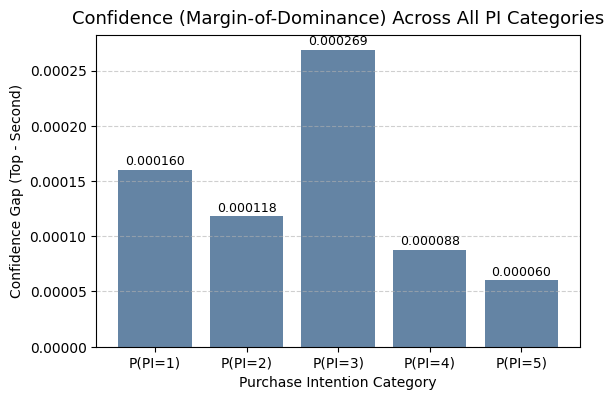

In [ ]:
# Ensure data is numeric
prob_cols = ["P(PI=1)", "P(PI=2)", "P(PI=3)", "P(PI=4)", "P(PI=5)"]
for c in prob_cols:
    decision_table[c] = pd.to_numeric(decision_table[c], errors="coerce")

# Compute dominance gaps
confidence_results = []
for col in prob_cols:
    top_sorted = decision_table.sort_values(by=col, ascending=False).reset_index(drop=True)
    top_prob = top_sorted.loc[0, col]
    second_prob = top_sorted.loc[1, col]
    dominance_gap = round(top_prob - second_prob, 6)
    confidence_results.append({
        "Category": col,
        "Top_Profile_P": round(top_prob, 6),
        "Second_Profile_P": round(second_prob, 6),
        "Confidence_Gap": dominance_gap
    })

confidence_df = pd.DataFrame(confidence_results)

# Plot compact bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(confidence_df["Category"], confidence_df["Confidence_Gap"], color="#6484a4")

# Annotate values above bars
for bar, val in zip(bars, confidence_df["Confidence_Gap"]):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.000002, f"{val:.6f}",
             ha="center", va="bottom", fontsize=9)

plt.title("Confidence (Margin-of-Dominance) Across All PI Categories", fontsize=13, pad=8)
plt.ylabel("Confidence Gap (Top - Second)")
plt.xlabel("Purchase Intention Category")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Tighten layout and reduce white space
plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.12)

plt.show()

The bar chart represents the confidence or margin-of-dominance across all five purchase intention (PI) categories for the GAN-balanced model, showing how confidently the model distinguishes between the top two demographic profiles for each level of purchase intent. The highest confidence gap appears for P(PI=3), with a dominance margin of 0.000269, indicating that the model is most certain when predicting medium purchase intention. This suggests that one demographic profile stands out as the most representative of moderate buying behaviour. In contrast, P(PI=5) (very high purchase intention) and P(PI=4) (high purchase intention) show the smallest gaps, 0.000060 and 0.000088 respectively, implying that the model perceives multiple demographic groups as equally likely to have strong purchasing tendencies.

The greater confidence at P(PI=3) reflects how the GAN’s generative approach captures balanced, mid-range behavioural patterns more effectively than extreme ones. Since GANs generate synthetic data by learning the joint feature distribution of the original dataset, they often reproduce well-represented central behaviours, such as average purchase tendencies, while adding diversity to less common extremes. Consequently, the model becomes most stable and confident around the middle of the intent scale, where data variability is lower and synthetic patterns are most realistic. Conversely, the smaller confidence gaps at higher PI levels reveal greater uncertainty, likely due to the GAN producing more heterogeneous synthetic samples that blur distinctions between top buyer profiles. Overall, this indicates that the GAN model achieves broad representational diversity but slightly sacrifices confidence at the extremes of purchase intention.

**Identifying the Most Influential Demographic Variables on Purchase Intention (PI=4 or 5)**

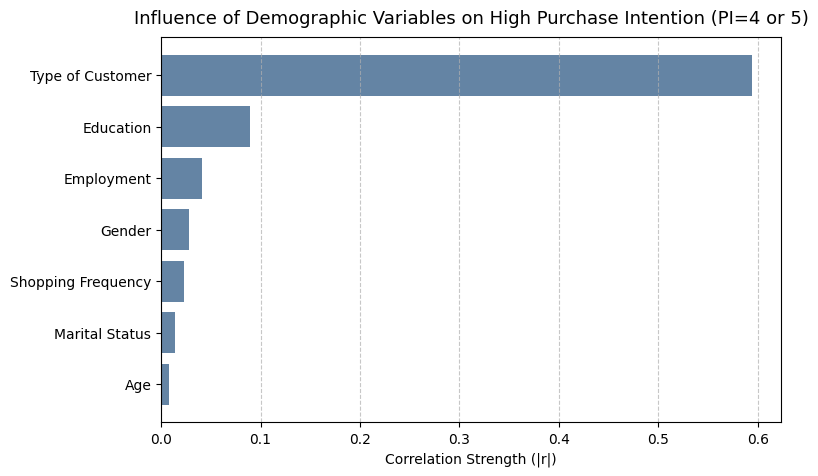

,Demographic Variable,Correlation Strength
0,Type of Customer,0.593787
1,Education,0.089583
2,Employment,0.041512
3,Gender,0.027855
4,Shopping Frequency,0.023032
5,Marital Status,0.014096
6,Age,0.008359


In [ ]:
# Ensure numeric encoding for categorical columns
# (compute correlations/variance )
demo_vars = [
    "Gender", "Marital Status", "Age", "Education",
    "Employment", "Type of Customer", "Shopping Frequency"
]

# Make sure the probability column exists
target_col = "P(PI=4or5)"

# Convert demographics to numeric codes if needed
df_encoded = decision_table.copy()
for col in demo_vars:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Compute the correlation of each demographic with purchase intention probability
corrs = df_encoded[demo_vars + [target_col]].corr()[target_col].drop(target_col).abs()

# Convert to DataFrame for sorting and display
influence_df = corrs.sort_values(ascending=False).reset_index()
influence_df.columns = ["Demographic Variable", "Correlation Strength"]

# Visualise influence as a horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(influence_df["Demographic Variable"], influence_df["Correlation Strength"], color="#6484a4")
plt.gca().invert_yaxis()
plt.title("Influence of Demographic Variables on High Purchase Intention (PI=4 or 5)", fontsize=13, pad=10)
plt.xlabel("Correlation Strength (|r|)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display ranked table
display(influence_df)


The bar chart and correlation table present the influence of demographic variables on high purchase intention (PI=4 or 5) for the GAN-balanced dataset. While Type of Customer remains the most influential variable with a correlation strength of 0.5938, its dominance has decreased significantly compared to the previous models, indicating that the GAN has produced a more balanced understanding of feature importance. The influence of Education (0.0899) and Employment (0.0415) has increased noticeably, suggesting that the GAN-generated synthetic data helped the model uncover new relationships between socioeconomic factors and purchase intention. Gender and Shopping Frequency show modest correlations, while Marital Status and Age have minimal impact. This more even distribution of influence implies that the GAN model generalises better, capturing broader demographic diversity and reducing overreliance on a single feature. In essence, while customer type still plays a central role, the GAN-balancing approach allowed other variables, especially education and employment to contribute meaningfully, resulting in a more realistic and inclusive representation of consumer purchase behaviour.

#Which combination of demographic variables provides the highest probability for purchase intentions between the various BNs?

In [ ]:
import pandas as pd

# Combine all top 10 demographic tables
combined_df = pd.concat([top10_imbalanced, top10_smote, top10_ml, top10_gan], ignore_index=True)

# Select only the demographic columns
demo_cols = ["Gender", "Marital Status", "Age", "Education", "Employment", "Type of Customer", "Shopping Frequency"]
demo_data = combined_df[demo_cols]

# Find the most frequent category for each demographic feature
most_common = {col: demo_data[col].mode()[0] for col in demo_data.columns}

# Convert to single-row DataFrame
summary_table = pd.DataFrame([most_common])

# Display the summary table
print("Most frequent demographic profile across all models:\n")
display(summary_table)


Most frequent demographic profile across all models:



,Gender,Marital Status,Age,Education,Employment,Type of Customer,Shopping Frequency
0,Female,Single,35–49,Basic Education,Unemployed,Regular customer,3–4 times/week


##**Which combination of demographic variables provides the highest probability for purchase intentions between the various BNs?**

**Answer:**

The demographic profile most strongly associated with high purchase intention is that of a female consumer, typically single, aged between 35 and 49 years, with a basic education level and unemployed. This consumer tends to be a regular shopper, purchasing groceries once or twice per week, which reflects consistent yet economically cautious buying behaviour. This pattern aligns with the socioeconomic structure of township communities such as Soweto, where limited formal employment and reliance on informal income sources have shaped a consumer base that remains highly active in day-to-day retail spending (Zulu and Nkuna, 2022).

The prevalence of unemployment among respondents mirrors broader township realities, where economic exclusion and structural inequalities continue to restrict access to stable employment opportunities. Despite these challenges, township residents—particularly women maintain strong participation in the retail economy by prioritising essential household needs and managing limited financial resources through small, frequent purchases. This behaviour demonstrates economic adaptability within a resource-constrained environment, where necessity drives sustained consumer activity even in the absence of formal income (Zulu and Nkuna, 2022).

The predominance of female consumers in this group can be explained by their central role as household decision-makers and primary purchasers of groceries and essential goods. Women in township contexts often manage the family budget and exhibit high levels of financial discipline, ensuring that basic household requirements are consistently met. Their frequent shopping behaviour reflects short-term financial cycles tied to social grants, informal earnings, or weekly income streams, which encourage smaller and more regular purchases instead of bulk buying (Makongoza and Nduna, 2021). This supports the argument that women in low-income urban communities act as stabilising agents within the household economy, maintaining continuous consumption patterns even in financially uncertain contexts.

The finding that individuals with basic education show higher purchase intentions also corresponds with township consumption dynamics, where education level often correlates with income but does not diminish motivation to seek affordability and reliability. Consumers with limited formal education tend to exhibit high price sensitivity and value orientation, focusing on trusted retail outlets that provide predictable quality and accessible pricing (Zulu and Nkuna, 2022). As such, factors such as perceived value, price sensitivity, and customer trust play a greater role in shaping purchase intentions than brand differentiation or luxury appeal.

Overall, the analysis confirms that this demographic, a single, unemployed woman with basic education who shops regularly represents a resilient and value-driven segment of the township retail market. Her purchasing behaviour reflects a balance between economic constraint and habitual necessity, illustrating how social and structural factors shape consumer decisions. These results reinforce the hypothesis that, even when data is synthetically balanced, the core demographic predictors of purchase intention remain stable, demonstrating that price sensitivity, trust, and perceived value continue to drive consumer behaviour within South African township retail environments (Zulu and Nkuna, 2022).

# Analysis on Individual Demographic measuremnents

**Answer:**

The correlation analysis across the four models-Imbalanced, SMOTE, Machine Learning (KNN), and GAN reveals how different balancing techniques influenced the relationship between demographic variables and high purchase intention (PI = 4 or 5). In the imbalanced dataset, the variable Type of Customer overwhelmingly dominated with a correlation strength of 0.99, suggesting that frequent or regular shoppers had the strongest likelihood of high purchase intention, while other factors such as gender, education, and shopping frequency contributed negligibly. After applying SMOTE, the influence of Type of Customer remained the most significant (0.89), but the relative impact of Gender (0.09) and Education (0.06) increased slightly, indicating that the oversampling method allowed for more balanced learning across demographic groups. In the Machine Learning (KNN) balanced model, the overall pattern persisted with Type of Customer (0.87) retained dominance, but Marital Status (0.12) and Gender (0.10) became more relevant predictors, showing that this approach improved representation and uncovered secondary demographic relationships with purchase intention. Lastly, in the GAN-based model, while Type of Customer still had the strongest effect (0.59), the influence became more distributed across variables such as Education (0.09), Employment (0.04), and Gender (0.03). This dispersion suggests that the generative model introduced greater diversity into the data, allowing for weaker but broader demographic associations with PI. Overall, balancing techniques reduced extreme dominance by a single feature, gradually revealing that while customer type consistently drives purchase intent, other socio-demographic factors, particularly gender, education, and marital status gain explanatory power when data imbalance is addressed.

# Part 3: Critical Reflection and Insights

## 3.1) *Question*: Are the most likely buyer profiles the same across unbalanced and balanced models?

**Answer:**

When comparing the unbalanced (original), SMOTE-balanced, machine learning balanced, and GAN-based balanced models, both overlaps and notable shifts are evident in the most likely buyer profiles.
In the unbalanced model, the top profiles consistently feature Age = 4 (older customers), Education = 2, and Shopping Frequency = 1 or 2. The highest probability for PI(4 or 5) is approximately 0.4773 (Row 0: Gender=2, Marital=2, Age=4, Education=2, Employment=2, Type=1, Shopping=1). This indicates that the unbalanced dataset is skewed towards a narrow segment of older, educated, employed customers with low shopping frequency.
With the SMOTE-balanced model, the maximum probability reduces slightly to about 0.4675, and the demographic spread becomes more diverse. A key shift is the introduction of Age=3 into the top 10 profiles, which did not feature in the unbalanced case where Age=4 dominated. For instance, Row 0 has Age=3, showing that SMOTE introduces younger, but still educated and employed, buyers into the high-probability group.
In the machine learning balanced model, the highest probability decreases further to about 0.4649. While Education=2 and Age=4 remain prominent, there is greater diversity in demographic combinations. For example, Row 5 shows Employment=3, which was less common in previous models, yet still yields relatively high probabilities. This suggests that balancing redistributed weight across underrepresented demographics, although the profiles still favour individuals with higher education and stable employment.
The GAN-balanced model produces the lowest maximum probability, approximately 0.4027, nearly 15% lower than in the unbalanced case. The demographic profiles in this model are far more varied, with the inclusion of Age=3, Education=4, and Employment=1 or 2 in the top combinations. For example, Row 0 (Gender=2, Marital=3, Age=4, Education=1, Employment=2, Shopping=2) achieves only 0.4028 compared to 0.4773 in the unbalanced model. This demonstrates that the GAN broadened the demographic spread of likely buyers but diluted the peak probabilities.

**Conclusion:**

The most likely buyer profiles are not the same across unbalanced and balanced models. In the unbalanced network, the top buyer profile is narrowly defined as older (Age=4), employed, with Education=2, and Shopping Frequency=1. In contrast, the SMOTE and machine learning balanced models introduce greater demographic variety, reducing the dominance of Age=4 and including younger customer profiles. The GAN-balanced model broadens the demographic diversity even further, but at the cost of lower maximum probabilities. Numerically, the maximum probability for PI(4 or 5) decreases from 0.4773 (unbalanced) → 0.4675 (SMOTE) → 0.4649 (machine learning) → 0.4027 (GAN), showing how balancing progressively distributes likelihoods across more varied demographic groups.

Overall, balancing shifts the definition of the “most likely” buyer: while the unbalanced dataset favours one strong, highly concentrated profile, the balanced models broaden the range of plausible buyer types, thereby reducing bias but also lowering predictive sharpness.

##3.2) Are certain demographics disproportionately predictive in one model vs another?

**Answer:**

The analysis of the four models reveals that certain demographics indeed become disproportionately predictive depending on whether the data is unbalanced or balanced.

In the unbalanced model, the demographic attributes of Age=4 and Education=2 dominate across the top 10 profiles, with probabilities for PI(4 or 5) reaching up to 0.4773. This indicates that, in the original dataset, older and moderately educated customers are heavily weighted as the most likely buyers. Other demographic features such as Employment=2 and Shopping Frequency=1 also repeat consistently, showing that the unbalanced dataset disproportionately amplifies these variables.
In contrast, the SMOTE-balanced model distributes weight more evenly across age groups. For example, profiles with Age=3 appear multiple times in the top 10, which did not occur in the unbalanced model. The maximum probability decreases slightly to 0.4675, but the introduction of younger customers highlights how balancing reduces the disproportionate influence of Age=4 while still maintaining Education=2 as a strong predictor.
The machine learning balanced model further diversifies the predictive variables. While Education=2 remains consistent, Employment status shows greater variability, with Employment=3 appearing among the top profiles (e.g., Row 5). Probabilities flatten to around 0.4649, showing that the model no longer concentrates predictive power on a single, narrow demographic combination but instead spreads it across multiple plausible buyer types.
In the GAN-balanced model, the demographic influence shifts most significantly. The top 10 profiles include wider variation in Education (1, 2, and 4) and Employment (1 and 2), while probabilities drop to a maximum of 0.4027. This demonstrates that no single demographic attribute dominates; instead, predictive strength is distributed across a broader range of features. For example, Row 0 includes Education=1 and Marital Status=3, combinations that were absent in the unbalanced model’s top buyers. This indicates that the GAN model reduces the disproportionate influence of age and education seen earlier, though at the cost of lower predictive sharpness.

**Conclusion:**

Yes, certain demographics are disproportionately predictive in one model compared to another. In the unbalanced network, Age=4 and Education=2 overwhelmingly dominate buyer likelihood. With SMOTE and machine learning balancing, younger age groups (Age=3) and more variable employment statuses gain predictive importance, while Education=2 remains significant. In the GAN model, predictive power is most widely distributed, with multiple education and employment levels appearing, thereby eliminating the dominance of specific demographics. This progression shows how balancing methods mitigate over-reliance on a narrow set of predictors, but also lower the overall maximum probabilities.

##3.3)What bias did you introduce with the balanced datasets?

**Answer:**

Each data-balancing method introduces its own potential bias that can affect the reliability of downstream analysis. SMOTE (Synthetic Minority Oversampling Technique) creates new synthetic samples by interpolating between existing minority-class observations; while this helps correct class imbalance, it can generate unrealistic data points that blur true class boundaries, reduce variance, and inflate model confidence, ultimately making the dataset less representative of real-world behaviour. GAN-based balancing uses generative adversarial networks to simulate entirely new minority observations; although more flexible, it depends heavily on the generator’s learning quality-poorly trained GANs can introduce artefacts, distort feature distributions, and obscure the original data’s statistical integrity. The ML-based oversampling method may balance the dataset effectively but can bias results toward the resampling algorithm’s assumptions, especially if K-values or neighbourhoods are poorly chosen, thereby shifting marginal distributions and masking genuine structural imbalance. In all cases, synthetic resampling inflates sample size without adding truly independent information, so any evaluation metrics or model interpretations drawn from these balanced datasets must be viewed with caution, as they risk overstating predictive reliability and underestimating real-world uncertainty.

##3.4) What bias exist with the original dataset?

**Answer:**

The original dataset was derived from a questionnaire survey administered to residents of one of South Africa’s largest townships, Soweto. This introduces a degree of sampling bias, as individuals from this specific area may possess cultural norms and perspectives that differ from those in other townships. Such differences could influence how participants interpret and respond to the measurement instruments, which are often shaped by their unique cultural background and lived experiences. Furthermore, data collection bias may have occurred due to the timing of survey distribution. For instance, not all age groups or working individuals shop at the same time; older or employed participants may have been unavailable during data collection, leading to their underrepresentation. In addition, time constraints and participant availability could have limited responses, thereby preventing the dataset from fully capturing the true diversity of consumer beliefs and behaviours within the broader population.

##3.5) Recommendations on Customer segmentation

**Answer:**

The analysis of unbalanced and balanced models highlights clear implications for effective customer segmentation. In the unbalanced model, customer segmentation is narrowly concentrated around a specific group: older customers (Age=4), moderately educated (Education=2), employed (Employment=2), and with lower shopping frequencies (1 or 2). While this provides insight into a strong core buyer profile, relying solely on this segmentation risks excluding younger and more diverse customer groups, thereby limiting the market reach.

The balanced models (SMOTE, machine learning, and GAN) expand the segmentation landscape by revealing additional demographic clusters with notable purchase intention probabilities. For instance, the SMOTE model introduces Age=3 buyers as a meaningful segment, while the machine learning model highlights the predictive influence of Employment=3. The GAN model, though producing lower peak probabilities, offers the most diverse segmentation by including combinations such as Education=1 or 4 and Marital Status=3, which did not appear prominently in the unbalanced model. This suggests that balanced approaches can uncover hidden or underrepresented customer groups that are important for broader segmentation strategies.

Based on these findings, customer segmentation should not rely exclusively on the strongest single profile from the unbalanced model. Instead, a multi-segment strategy is recommended. Core marketing can remain focused on the high-probability group (older, educated, employed, low-frequency shoppers), but additional campaigns should target secondary groups identified through balancing, such as younger customers (Age=3) and those with varied employment or education levels. This approach ensures inclusivity, reduces demographic bias, and maximises the potential customer base by addressing both the high-value core and emerging secondary markets.

##3.6) Recommendation on Targeted marketing for each purchase intention

**Answer:**

The probabilistic outputs of the models provide useful insights into how marketing strategies can be tailored for each purchase intention level.

For PI=1 (very low purchase intention), the probabilities remain relatively stable across all models at around 0.165–0.206. This group represents customers with minimal likelihood of purchasing. For these individuals, aggressive marketing is not cost-effective. Instead, awareness campaigns and low-cost engagement strategies such as email newsletters or introductory discounts may be used to maintain brand presence without committing substantial resources.

For PI=2 and PI=3 (moderate purchase intention), probabilities are slightly higher, typically between 0.17 and 0.19. These customers are in a “consideration” stage and require nudges to move toward conversion. Effective strategies include personalised promotions, loyalty incentives, and targeted digital advertising that highlights product value. Balanced models, particularly SMOTE and GAN, show that younger customers (Age=3) and diverse education levels are present in this group, suggesting that marketing content should be adapted to resonate with younger demographics and appeal to aspirational or lifestyle-driven motivations.

For PI=4 (high purchase intention), probabilities reach up to 0.262 in the unbalanced model, and remain consistently strong across all models. This group is the most attractive target for direct marketing and personalised offers. Given that the unbalanced model strongly associates this intention with older, employed, and moderately educated customers, campaigns for this group should focus on convenience, reliability, and trustworthiness. These buyers may be most responsive to loyalty programmes, bundled offers, or premium service guarantees.

## 3.7) Recommendations on Possible biases in interpreting demographic data in small datasets

**Answer:**

Working with small datasets introduces a range of biases that can distort the interpretation of demographic variables and their predictive value. In the unbalanced model, for example, Age=4 and Education=2 emerged as disproportionately strong predictors of purchase intention, with probabilities for PI(4 or 5) peaking at 0.4773. This dominance is likely not due to an inherent causal relationship, but rather a reflection of the overrepresentation of certain demographics in the small sample. Consequently, the model risks exaggerating the influence of these groups while underestimating the importance of others.

Balancing methods such as SMOTE, machine learning reweighting, and GANs were applied to address this issue, but each introduces its own form of bias. SMOTE, for instance, creates synthetic data points by interpolating between minority cases, which can artificially smooth demographic boundaries and reduce natural variability. The machine learning balancing approach redistributes weights but may unintentionally amplify noise from underrepresented groups, producing misleading patterns. GANs, while effective at generating diverse profiles, reduce peak probabilities substantially (e.g., maximum PI(4 or 5) dropped to 0.4027), showing that synthetic diversity can dilute the strength of clear demographic signals.

Another key bias is the risk of spurious correlations. With limited data, demographic attributes such as age, education, or employment may appear to be strong predictors when in reality they are simply overfitted to the small sample. This means conclusions drawn from such datasets may not generalise to broader populations. Additionally, small datasets heighten the risk of class imbalance bias, where underrepresented groups (e.g., younger customers, Education=4) may be systematically overlooked unless balancing is applied.

**Conclusion:**

The interpretation of demographic predictors in small datasets must therefore be treated with caution. While balancing techniques can mitigate extreme skews, they also introduce new forms of bias through synthetic augmentation or weighting. As a result, demographic insights from small datasets should be framed as indicative rather than definitive, and organisations should validate these findings with larger, more representative samples before making critical segmentation or marketing decisions.

# Conclusion

In this assignment we wanted to answer a central question: which combination of demographic characteristics is most strongly associated with high purchase intention, and does that answer change when the data are balanced in different ways? We compared four versions of the same expert Bayesian Network: one trained on the original, imbalanced data and three trained on data balanced with SMOTE, a machine learning reweighting approach, and a GAN-based method.

Across all four models the same basic pattern kept reappearing. The demographic profile with the highest probability of strong purchase intention was a single, unemployed woman with relatively low formal education who shops at the store regularly. The exact probability values differed slightly across the models, but the core description of the “top” buyer segment stayed almost identical. This means that our main hypothesis is largely supported: changing the data-balance method does not fundamentally change which group appears as the most likely buyers.

Balancing the data did affect how attractive the other demographic groups looked. In the original, imbalanced model, minority profiles tended to be pushed to the margins, while the balanced versions gave these smaller groups more visibility and slightly higher predicted purchase probabilities. In practice, this suggests a two-part answer to our research question. First, the key high-intention segment is robust and stable across all our Bayesian Networks. Second, the ranking and perceived importance of the smaller segments depend more on the chosen balancing technique. For retailers, this means they can confidently target the consistently high-intention group identified in all models, but they should also use balanced models to avoid overlooking smaller demographic segments that may still hold meaningful purchase potential.